In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the merged NHS dataset (adjust file path if needed)
nhs_all = pd.read_csv("nhs_ae_merged.csv")

# Convert 'year' to a categorical variable
nhs_all["year"] = nhs_all["year"].astype(str)

# Display first few rows
nhs_all.head()


,period,org_code,parent_org,org_name,a&e_attendances_type_1,a&e_attendances_type_2,a&e_attendances_other_a&e_department,a&e_attendances_booked_appointments_type_1,a&e_attendances_booked_appointments_type_2,a&e_attendances_booked_appointments_other_department,...,attendances_over_4hrs_booked_appointments_other_department,patients_who_have_waited_4-12_hs_from_dta_to_admission,patients_who_have_waited_12+_hrs_from_dta_to_admission,emergency_admissions_via_a&e_-_type_1,emergency_admissions_via_a&e_-_type_2,emergency_admissions_via_a&e_-_other_a&e_department,other_emergency_admissions,month,year,percentage_seen_within_4_hours
0,MSitAE-APRIL-2024,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0.0,0.0,546.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,April,2024,NaN
1,MSitAE-APRIL-2024,RAN,NHS ENGLAND LONDON,ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41.0,April,2024,NaN
2,MSitAE-APRIL-2024,8J094,NHS ENGLAND MIDLANDS,BADGER LTD,0.0,0.0,0.0,0.0,0.0,2078.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,April,2024,NaN
3,MSitAE-APRIL-2024,AD913,NHS ENGLAND LONDON,BECKENHAM BEACON UCC,0.0,0.0,3694.0,0.0,0.0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,April,2024,NaN
4,MSitAE-APRIL-2024,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0.0,0.0,2897.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,April,2024,NaN


In [11]:
# Check for missing values
print(nhs_all.isnull().sum())

# Ensure 'month' is categorical
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
nhs_all['month'] = pd.Categorical(nhs_all['month'], categories=months_order, ordered=True)

# Summary statistics
nhs_all.describe()



period                                                           0
org_code                                                         0
parent_org                                                       0
org_name                                                         0
a&e_attendances_type_1                                           0
a&e_attendances_type_2                                           0
a&e_attendances_other_a&e_department                             0
a&e_attendances_booked_appointments_type_1                       0
a&e_attendances_booked_appointments_type_2                       0
a&e_attendances_booked_appointments_other_department             0
attendances_over_4hrs_type_1                                     0
attendances_over_4hrs_type_2                                     0
attendances_over_4hrs_other_department                           0
attendances_over_4hrs_booked_appointments_type_1                 0
attendances_over_4hrs_booked_appointments_type_2              

,a&e_attendances_type_1,a&e_attendances_type_2,a&e_attendances_other_a&e_department,a&e_attendances_booked_appointments_type_1,a&e_attendances_booked_appointments_type_2,a&e_attendances_booked_appointments_other_department,attendances_over_4hrs_type_1,attendances_over_4hrs_type_2,attendances_over_4hrs_other_department,attendances_over_4hrs_booked_appointments_type_1,attendances_over_4hrs_booked_appointments_type_2,attendances_over_4hrs_booked_appointments_other_department,patients_who_have_waited_4-12_hs_from_dta_to_admission,patients_who_have_waited_12+_hrs_from_dta_to_admission,emergency_admissions_via_a&e_-_type_1,emergency_admissions_via_a&e_-_type_2,emergency_admissions_via_a&e_-_other_a&e_department,other_emergency_admissions,percentage_seen_within_4_hours
count,9.882000e+03,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.00000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,5861.000000
mean,1.248642e+04,395.844566,6431.039263,289.093099,4.072253,395.377454,4614.126493,13.141469,257.274236,59.82716,0.061121,6.850638,900.173244,268.751670,3622.834244,12.830399,49.114552,1235.881603,63.540002
std,9.045929e+04,2942.154598,47054.501304,2125.220910,49.005598,2931.451501,34230.674305,107.533457,2059.011047,458.66813,0.863705,59.851098,6597.389218,2252.298305,26198.366004,109.123989,372.684399,8962.937496,15.365595
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.756582
25%,0.000000e+00,0.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.858732
50%,6.141000e+03,0.000000,2179.000000,0.000000,0.000000,0.000000,1553.500000,0.000000,1.000000,0.00000,0.000000,0.000000,246.000000,0.000000,1674.500000,0.000000,0.000000,347.000000,60.651515
75%,1.050075e+04,0.000000,5203.750000,154.000000,0.000000,116.000000,3981.000000,0.000000,99.000000,9.00000,0.000000,0.000000,719.000000,123.000000,3058.000000,0.000000,0.000000,997.750000,70.955231
max,1.439178e+06,50804.000000,841230.000000,43067.000000,1828.000000,54131.000000,633815.000000,2370.000000,76062.000000,9567.00000,25.000000,1478.000000,115548.000000,54573.000000,420025.000000,1881.000000,7719.000000,147086.000000,100.000000


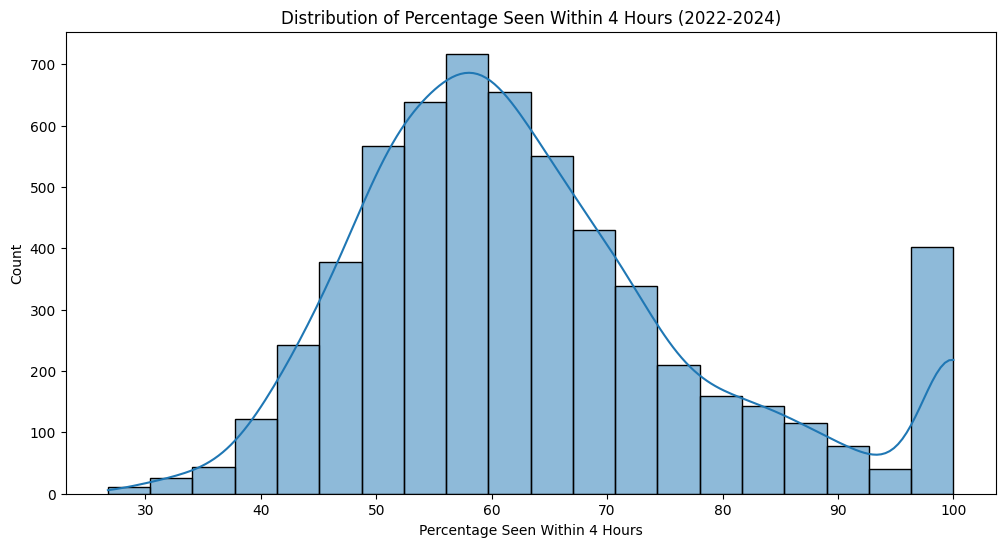

In [12]:
# Histogram of Percentage Seen Within 4 Hours
plt.figure(figsize=(12, 6))
sns.histplot(nhs_all['percentage_seen_within_4_hours'], bins=20, kde=True)
plt.xlabel("Percentage Seen Within 4 Hours")
plt.ylabel("Count")
plt.title("Distribution of Percentage Seen Within 4 Hours (2022-2024)")
plt.show()


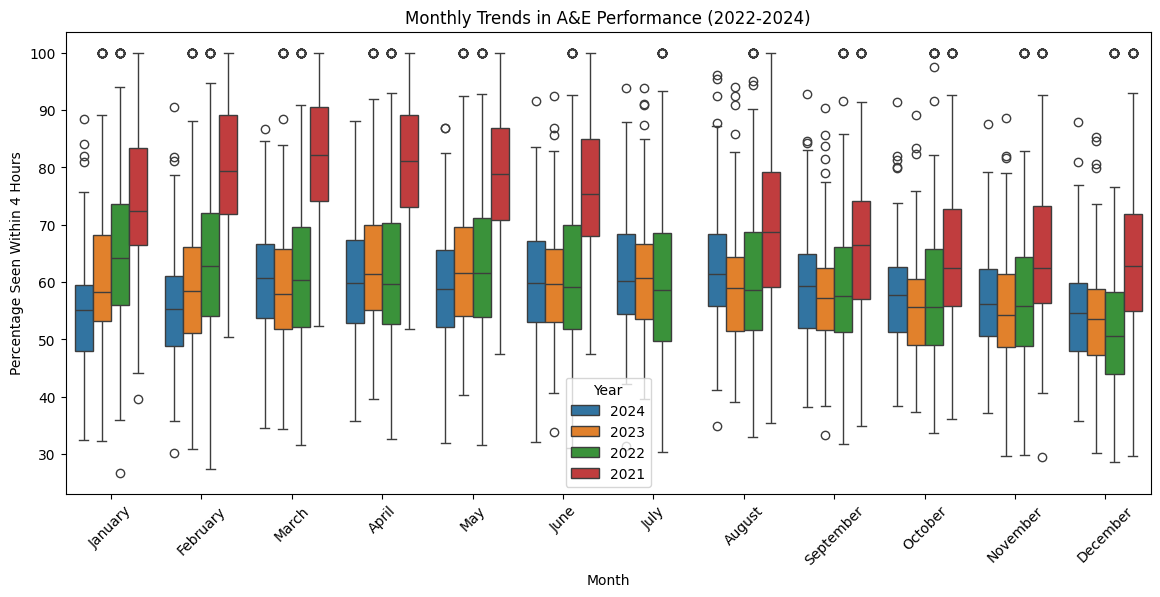

In [13]:
# Monthly Trends in A&E Performance
plt.figure(figsize=(14, 6))
sns.boxplot(data=nhs_all, x="month", y="percentage_seen_within_4_hours", hue="year")
plt.xlabel("Month")
plt.ylabel("Percentage Seen Within 4 Hours")
plt.title("Monthly Trends in A&E Performance (2022-2024)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()


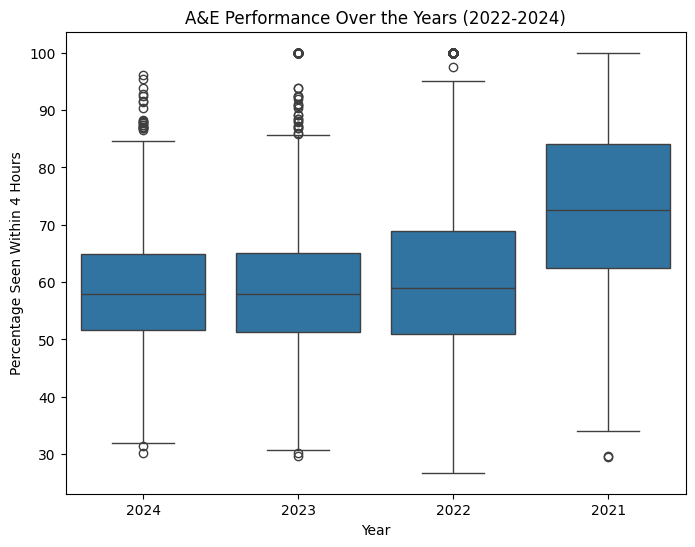

In [14]:
# Overall Performance Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=nhs_all, x="year", y="percentage_seen_within_4_hours")
plt.xlabel("Year")
plt.ylabel("Percentage Seen Within 4 Hours")
plt.title("A&E Performance Over the Years (2022-2024)")
plt.show()
